**It is for skew Distribution**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.isnull().sum()

,0
cgpa,0
placement_exam_marks,0
placed,0


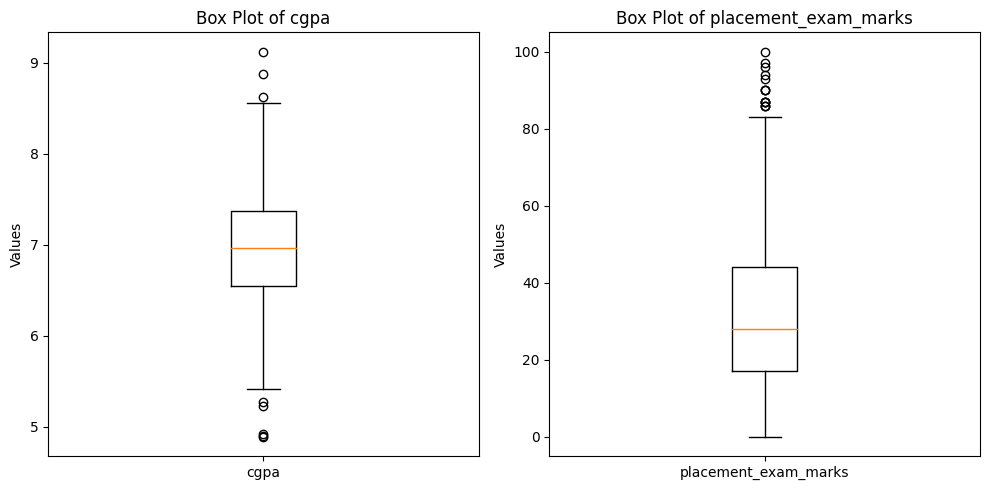

In [5]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Box plot for CGPA
axs[0].boxplot(df['cgpa'], labels=['cgpa'])
axs[0].set_title('Box Plot of cgpa')
axs[0].set_ylabel('Values')

# Box plot for IQ
axs[1].boxplot(df['placement_exam_marks'], labels=['placement_exam_marks'])
axs[1].set_title('Box Plot of placement_exam_marks')
axs[1].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()


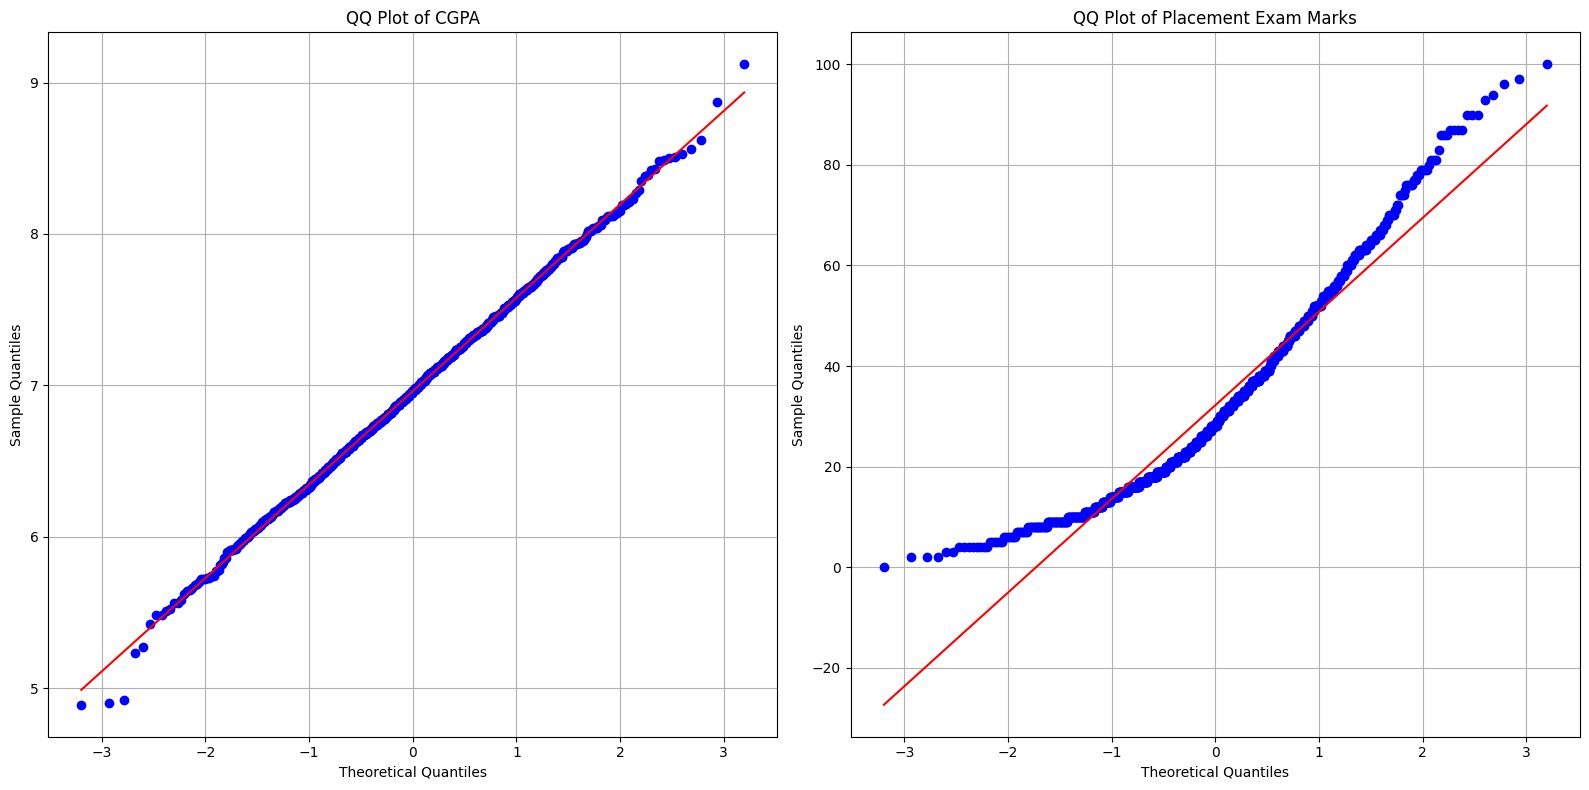

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# QQ plot for CGPA
stats.probplot(df['cgpa'], dist="norm", plot=axs[0])
axs[0].set_title('QQ Plot of CGPA')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Sample Quantiles')
axs[0].grid()

# QQ plot for Placement Exam Marks
stats.probplot(df['placement_exam_marks'], dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot of Placement Exam Marks')
axs[1].set_xlabel('Theoretical Quantiles')
axs[1].set_ylabel('Sample Quantiles')
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
df.shape # since data is too less but it is not recommended to remove the outliers either to fill it

(1000, 3)

**Here we work on Placement Exam Marks  ** because it is skew distribution

In [8]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [9]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [10]:
percentile75

44.0

In [12]:
iqr = percentile75-percentile25
print(iqr)

27.0


In [15]:
#finding the Boundaries values
lower_limit = percentile25-1.5*iqr
upper_limit = percentile75+1.5*iqr
print("Lower Limit = ",lower_limit)
print("Upper_Limit =  ",upper_limit)

Lower Limit =  -23.5
Upper_Limit =   84.5


**Findint Outliers**

In [19]:
# Finding the outliers
df_outliers = df[(df['placement_exam_marks']>upper_limit ) | (df['placement_exam_marks']<lower_limit)]

In [20]:
df_outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [22]:
# no. of outliers in the data
df_outliers.shape

(15, 3)

**Trimming: Remove the outliers**

In [23]:
df = df[(df['placement_exam_marks']<upper_limit ) & (df['placement_exam_marks']>lower_limit)]

In [24]:
df.shape

(985, 3)